In [62]:
import pandas as pd 
import seaborn as sns
import numpy as np
import  matplotlib
import  matplotlib.pyplot as plt

In [63]:
input_data = pd.read_excel(r'/Users/dylan/DataBase/signal_process/benchmark_result-30_5.xlsx')

In [89]:

# 相关性检验
import heapq
def correlation(value):
    input_pivot = input_data.pivot_table(index = 'start_date',columns = 'model',values = value)
    correlation_list = [input_pivot['benchmark'].corr(input_pivot[model],'spearman') for model in input_pivot.columns]
    del correlation_list[-1]
    index = map(correlation_list.index, heapq.nsmallest(3, correlation_list)) 
    return list(index)

In [90]:

correlation('pc_ratio_sp')


[18, 56, 26]

In [91]:
correlation('sharpe_ratio_sp')

[42, 60, 24]

In [92]:
correlation('annual_return_sp')

[42, 18, 60]

In [93]:
correlation('sp_rank')

[10, 28, 25]

/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib

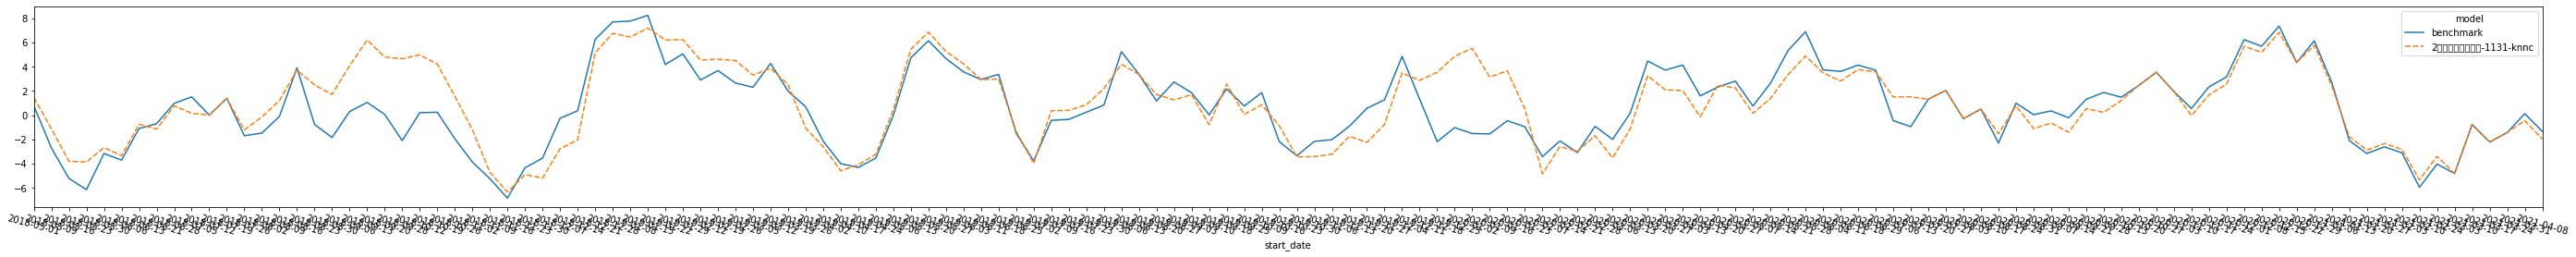

In [98]:
# 选择模型 2日开盘价持续下跌-1121-lr 探究
input_pivot = input_data.pivot_table(index = 'start_date',columns = 'model',values = 'sharpe_ratio_sp')
input_pivot = input_pivot[['benchmark','2日开盘价持续下跌-1131-knnc']]
ax1 = sns.lineplot(data = input_pivot)

# 拉长x
plt.xticks(rotation=-15)
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
N = len(input_pivot['benchmark']) # 注意此处N的值
# maxsize = max([t.get_window_extent().width for t in tl])
maxsize = 20 # 可以更改
m = 0.2  # inch margin
s = maxsize / plt.gcf().dpi * N + 2 * m
margin = m / plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1. - margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])



/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib

KeyboardInterrupt: 

/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30424 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/dylan/opt/anaconda3/lib/python3.8/site-packages/matplotlib

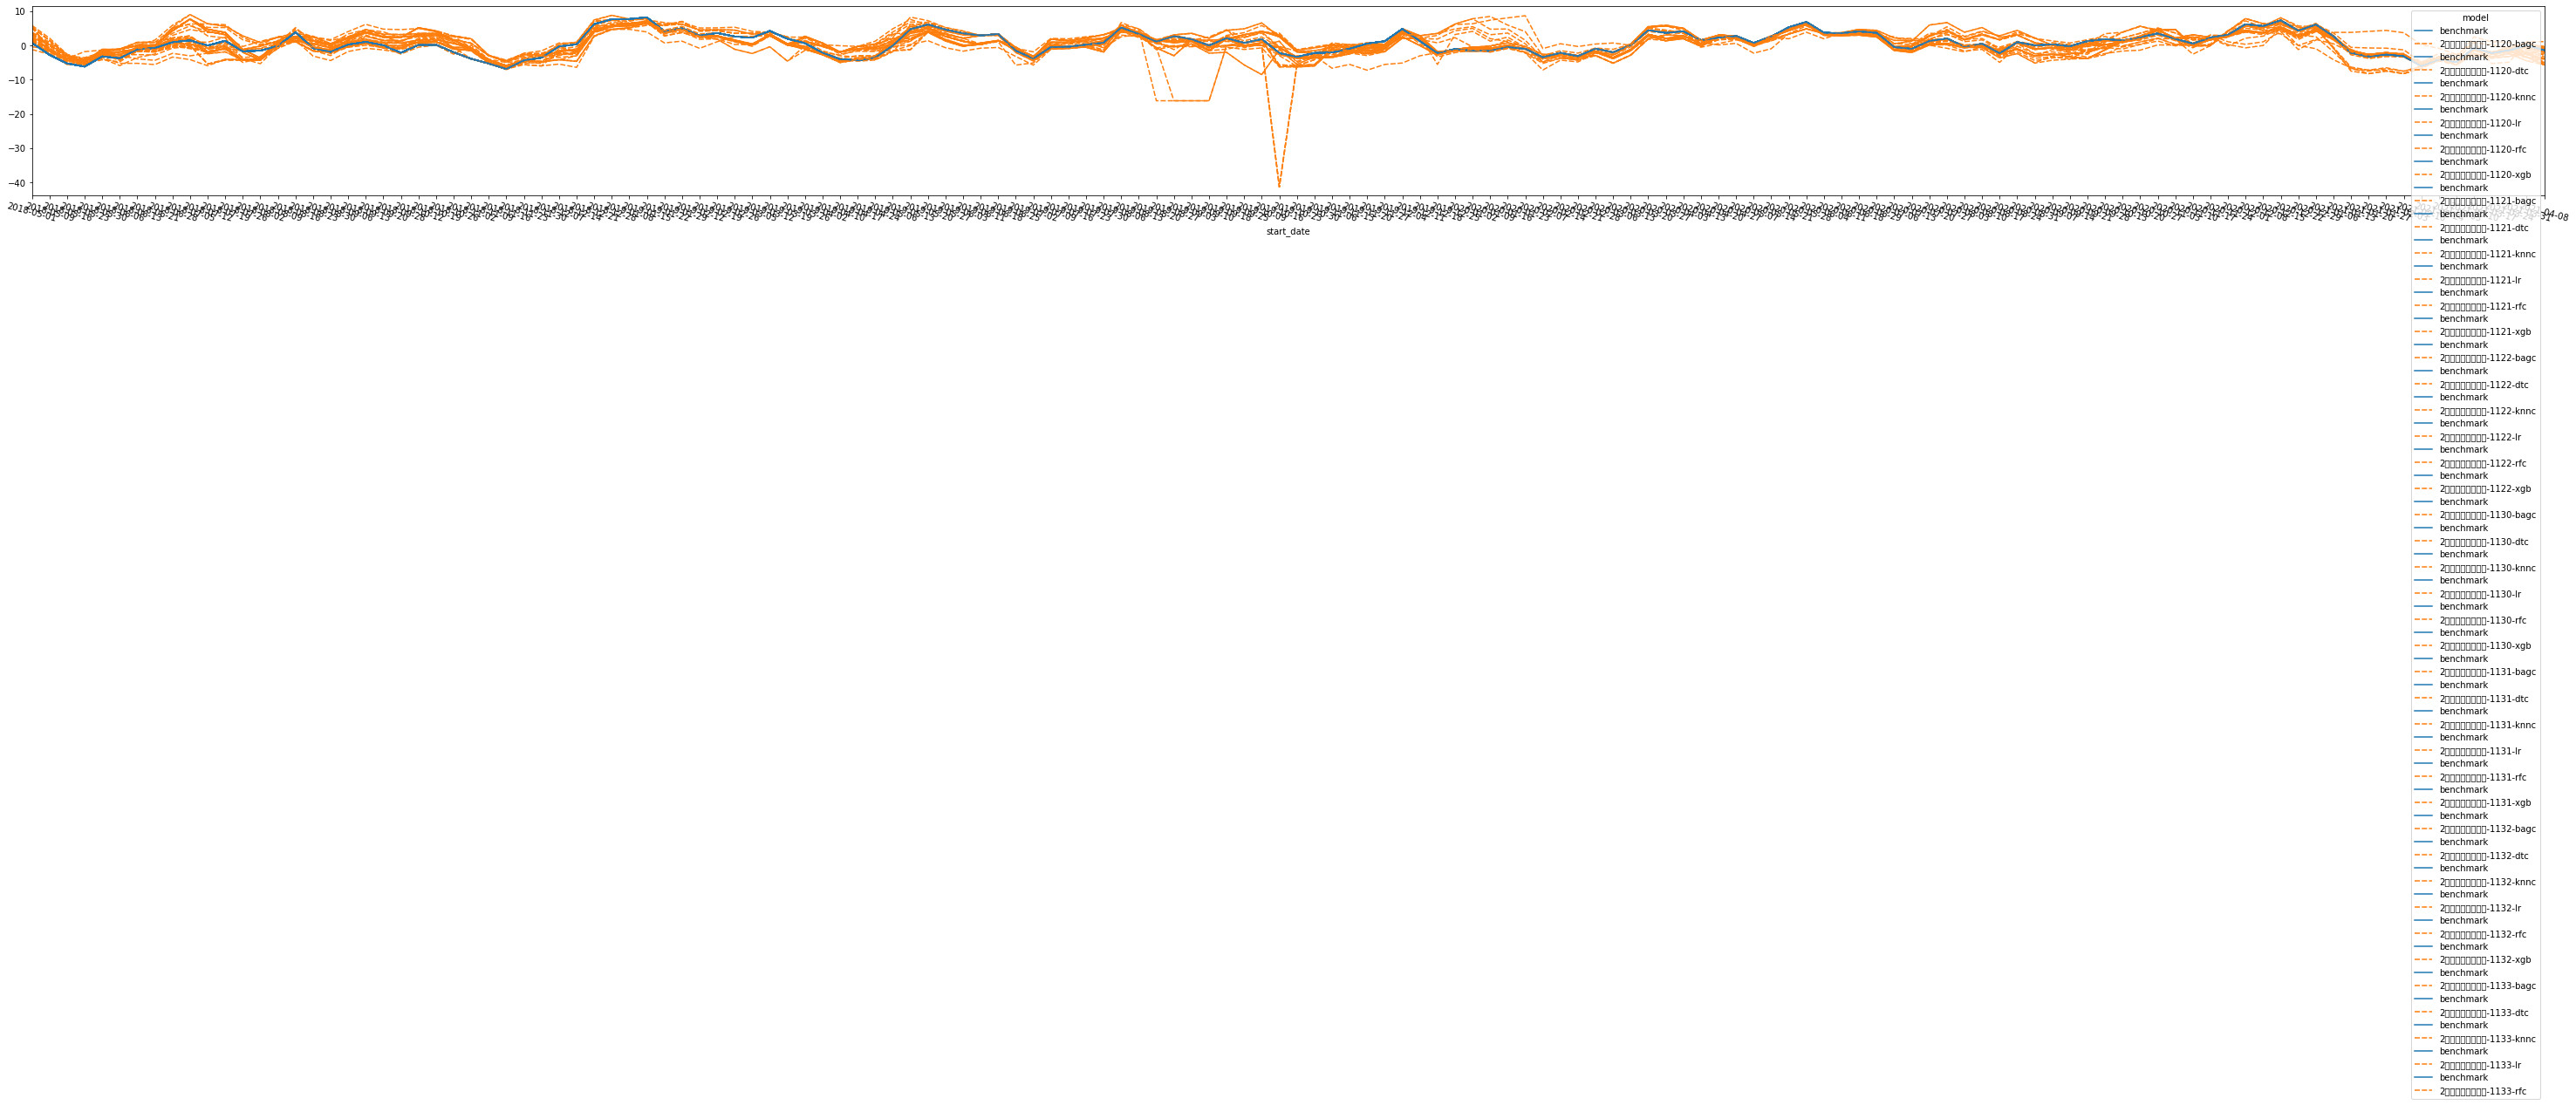

In [102]:
# 1
input_pivot = input_data.pivot_table(index = 'start_date',columns = 'model',values = 'sharpe_ratio_sp')
for model in input_pivot.columns :
    input_pivot_filter = input_pivot[['benchmark',model]]
    sns.lineplot(data = input_pivot_filter)
    # 拉长x
    plt.xticks(rotation=-15)
    plt.gca().margins(x=0)
    plt.gcf().canvas.draw()
    tl = plt.gca().get_xticklabels()
    N = len(input_pivot['benchmark']) # 注意此处N的值
    # maxsize = max([t.get_window_extent().width for t in tl])
    maxsize = 20 # 可以更改
    m = 0.2  # inch margin
    s = maxsize / plt.gcf().dpi * N + 2 * m
    margin = m / plt.gcf().get_size_inches()[0]
    plt.gcf().subplots_adjust(left=margin, right=1. - margin)
    plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
